# Description

Runs gaussian mixture model on the umap version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

10

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=10
env: OPEN_BLAS_NUM_THREADS=10
env: NUMEXPR_NUM_THREADS=10
env: OMP_NUM_THREADS=10


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 80000

In [7]:
NULL_DIR = conf.RESULTS["CLUSTERING_NULL_DIR"] / "shuffle_genes"

## Input data

In [8]:
INPUT_SUBSET = "umap"

In [9]:
INPUT_STEM = "z_score_std-projection-smultixcan-efo_partial-mashr-zscores"

In [10]:
DR_OPTIONS = {
    "n_components": 50,
    "metric": "euclidean",
    "n_neighbors": 15,
    "random_state": 0,
}

In [11]:
input_filepath = Path(
    NULL_DIR,
    "data_transformations",
    INPUT_SUBSET,
    generate_result_set_name(
        DR_OPTIONS, prefix=f"{INPUT_SUBSET}-{INPUT_STEM}-", suffix=".pkl"
    ),
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/data_transformations/umap/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0.pkl')

'umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores-metric_euclidean-n_components_50-n_neighbors_15-random_state_0'

## Clustering

In [12]:
from sklearn.mixture import GaussianMixture

In [13]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [14]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["N_INIT"] = 10
CLUSTERING_OPTIONS["COVARIANCE_TYPE"] = "full"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'N_INIT': 10,
 'COVARIANCE_TYPE': 'full'}

In [15]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = GaussianMixture(
            n_components=k,
            n_init=CLUSTERING_OPTIONS["N_INIT"],
            covariance_type=CLUSTERING_OPTIONS["COVARIANCE_TYPE"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [16]:
display(len(CLUSTERERS))

295

In [17]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('GaussianMixture #0',
 GaussianMixture(n_components=2, n_init=10, random_state=80000))

('GaussianMixture #1',
 GaussianMixture(n_components=2, n_init=10, random_state=80001))

In [18]:
clustering_method_name = method_name
display(clustering_method_name)

'GaussianMixture'

## Output directory

In [19]:
# output dir for this notebook
RESULTS_DIR = Path(
    NULL_DIR,
    "runs",
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [20]:
data = pd.read_pickle(input_filepath)

In [21]:
data.shape

(3752, 50)

In [22]:
data.head()

,UMAP1,UMAP2,UMAP3,UMAP4,UMAP5,UMAP6,UMAP7,UMAP8,UMAP9,UMAP10,...,UMAP41,UMAP42,UMAP43,UMAP44,UMAP45,UMAP46,UMAP47,UMAP48,UMAP49,UMAP50
100001_raw-Food_weight,3.507164,4.783988,2.721716,5.306452,3.881773,3.321169,4.960411,5.549141,4.841390,3.194715,...,9.187434,2.469095,1.234505,9.594598,0.333957,8.039461,5.482632,4.958725,2.801697,5.658304
100002_raw-Energy,3.606311,4.727725,2.704979,5.271563,3.724591,3.337485,4.781901,5.599291,4.791382,3.003243,...,9.121886,2.506307,1.227272,9.574743,0.344036,8.037237,5.477282,4.900286,2.729573,5.601664
100003_raw-Protein,3.594661,4.729409,2.682754,5.218021,3.652642,3.325793,4.771183,5.580573,4.820001,3.022622,...,9.097627,2.484138,1.221946,9.572356,0.339655,8.043584,5.472909,4.895183,2.765254,5.663905
100004_raw-Fat,3.459632,4.797582,2.755155,5.230875,3.784350,3.366962,4.942765,5.604582,4.731943,3.045358,...,9.124997,2.587374,1.199794,9.633430,0.286029,8.071218,5.476699,4.869335,2.766068,5.523112
100005_raw-Carbohydrate,3.436945,4.827942,2.761039,5.268426,4.005526,3.357875,5.036726,5.545567,4.842803,3.282768,...,9.181946,2.513265,1.200227,9.631493,0.349085,8.032649,5.486337,4.947569,2.811798,5.677997


In [23]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [24]:
from clustering.ensembles.utils import generate_ensemble

In [25]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

100%|██████████| 295/295 [49:35<00:00, 10.09s/it]


In [26]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [27]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2


In [28]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [29]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [30]:
assert ensemble_stats["min"] > 1

In [31]:
assert not ensemble["n_clusters"].isna().any()

In [32]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [33]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [34]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [35]:
from sklearn.metrics import calinski_harabasz_score

In [36]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [37]:
ensemble.shape

(295, 4)

In [38]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1640.599602
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1640.599602
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1640.726868
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1640.599602
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,1640.726868


## Save

In [39]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [40]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [41]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,1640.650509
3,2546.262135
4,2753.406769
5,2993.507110
6,3107.410024
7,3116.400910
8,2999.238504
9,3182.983473
10,3223.884993


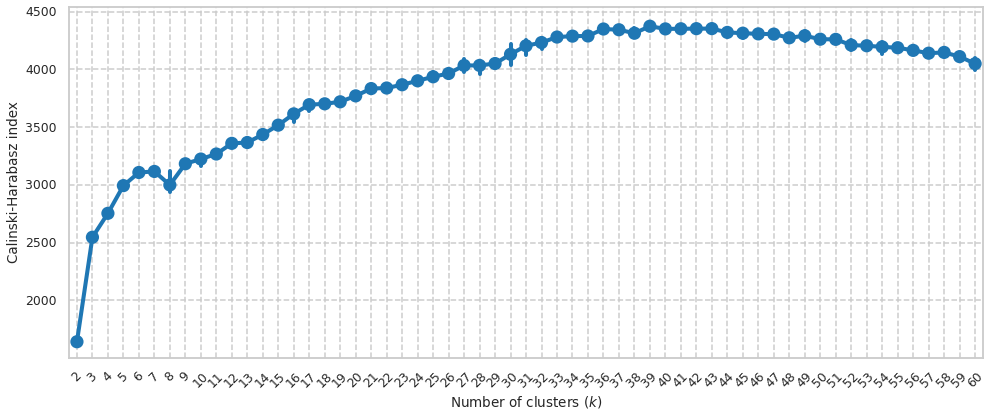

In [42]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [43]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [44]:
parts.head()

n_clusters
2    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
3    [[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0,...
4    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
5    [[3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0,...
6    [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...
dtype: object

In [45]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [46]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [47]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [48]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

3     1.000000
5     1.000000
7     1.000000
4     0.999433
2     0.999360
6     0.989047
9     0.938877
12    0.922124
16    0.852462
11    0.834426
17    0.832337
10    0.804215
8     0.781702
19    0.761623
14    0.757100
Name: k, dtype: float64

In [49]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [50]:
parts_ari_df.shape

(59, 10)

In [51]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [52]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,0.998933,1.0,0.998933,0.998933,1.000000,0.998933,0.998933,1.000000,0.998933
3,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.0,0.998583,1.000000,1.000000,0.998583,1.000000,0.998583,0.998583
5,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.976452,0.995781,1.0,1.000000,0.973774,0.976452,0.976452,0.995781,0.995781,1.000000


## Save

In [53]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/opt/data/results/clustering/null_sims/shuffle_genes/runs/umap-z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-stability-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [54]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [55]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [56]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [57]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.000000
1,2,1,0.998933
2,2,2,1.000000
3,2,3,0.998933
4,2,4,0.998933


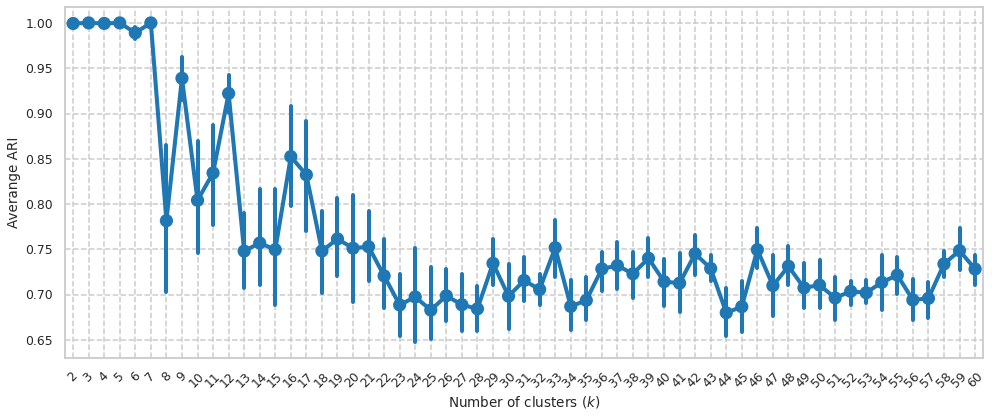

In [58]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()